<a href="https://colab.research.google.com/github/elhidarinouhayla/classification-des-images/blob/main/Classification_d%E2%80%99images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [2]:
# 1- charge de donnees:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images ,train_labels), (test_images ,test_labels) = fashion_mnist.load_data()
print('la dimention du train_images :', train_images.shape)
print('la dimention du test_images :',test_images.shape)
print('la dimention du train_labels :',train_labels.shape)
print('la dimention du test_labels :',(test_labels.shape))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
la dimention du train_images : (60000, 28, 28)
la dimention du test_images : (10000, 28, 28)
la dimention du train_labels : (60000,)
la dimention du test_labels : (10000,)


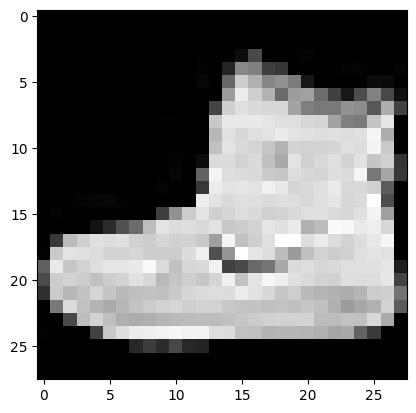

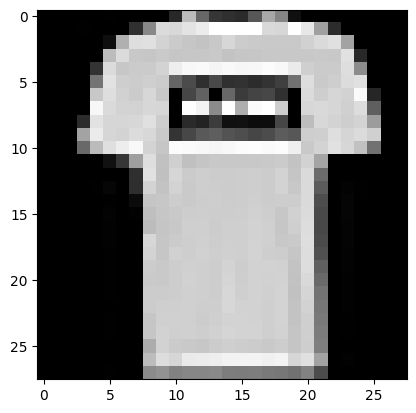

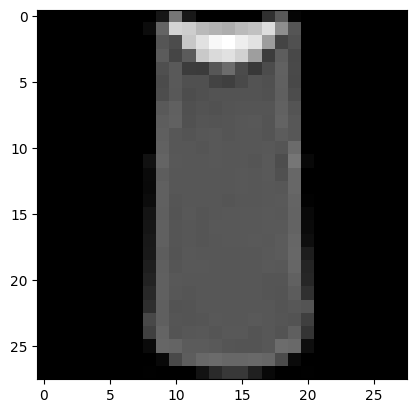

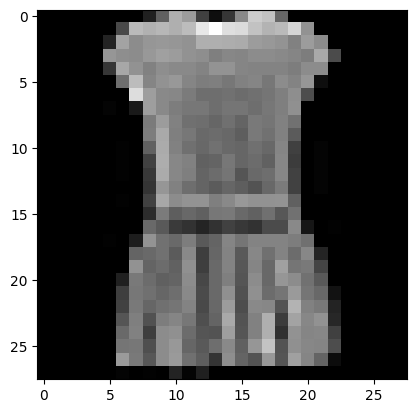

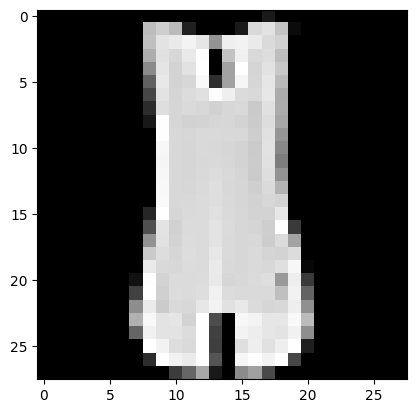

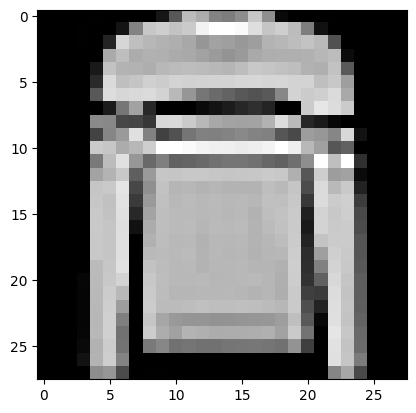

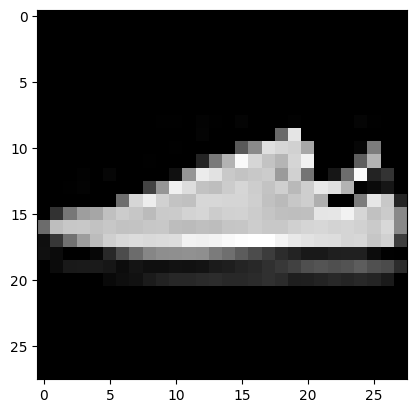

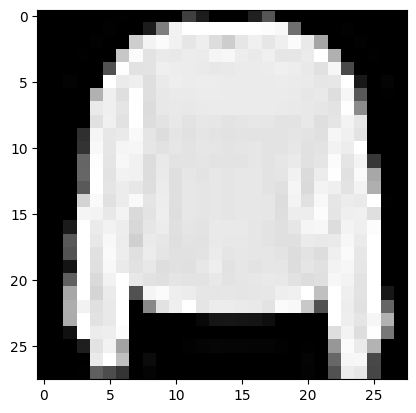

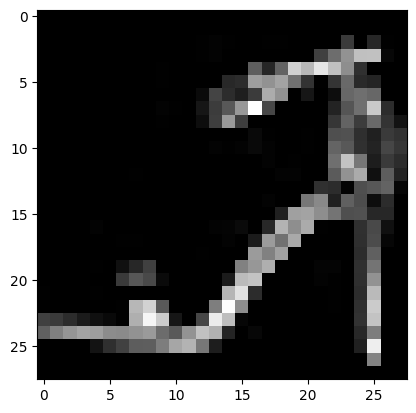

In [3]:
# 2- visualisation des donnees:
for i in range(9):
  plt.imshow(train_images[i], cmap= 'gray')
  plt.show()

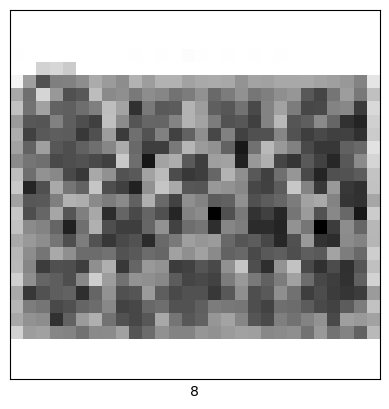

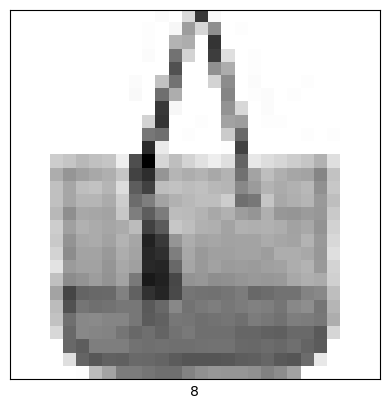

In [4]:
# 3- Afficher les images appartenant à une classe definie:
for i in range(50):
  if train_labels[i] == 8:
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
    plt.show()

In [5]:
# 4- la liste des classes:
class_names = ['T-shirt/top', 'pantalon', 'Pull', 'Dress', 'Manteau',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Botte']

10


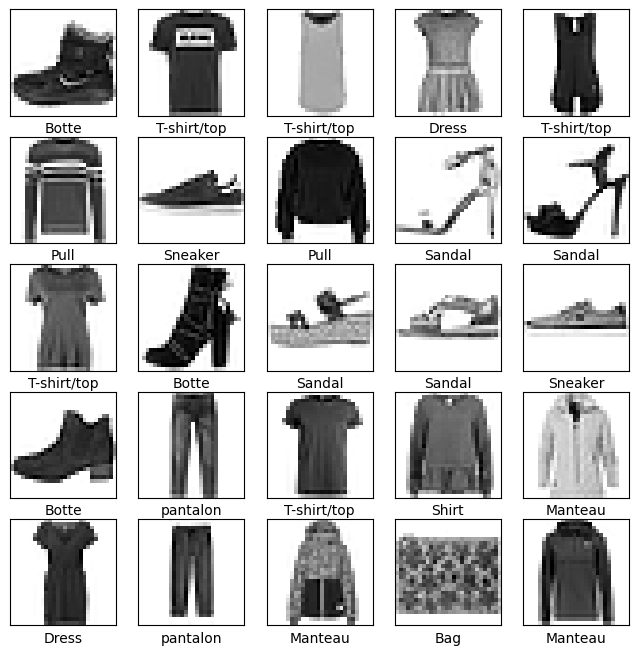

In [6]:
# 4- donner un nom pour chaque image:
class_names = ['T-shirt/top', 'pantalon', 'Pull', 'Dress', 'Manteau',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Botte']
print(len(class_names))
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [7]:
# 4- normalisation des images:
train_images = train_images / 255
test_images = test_images / 255

In [15]:
# 5- Creation d’un modele de reseau de neurones:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', name='layer1'),
    layers.Dense(10, activation='softmax', name='layer2')
    ])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 6- Compilation du modèle:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# 7- entrainement du modele:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.7714 - loss: 0.6259 - val_accuracy: 0.8659 - val_loss: 0.3742
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8857 - loss: 0.3162 - val_accuracy: 0.8908 - val_loss: 0.3030
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9046 - loss: 0.2622 - val_accuracy: 0.8969 - val_loss: 0.2827
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9164 - loss: 0.2282 - val_accuracy: 0.9008 - val_loss: 0.2749
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9264 - loss: 0.2001 - val_accuracy: 0.9019 - val_loss: 0.2853
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9332 - loss: 0.1748 - val_accuracy: 0.9117 - val_loss: 0.2485
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9428 - loss: 0.1525 - val_accuracy: 0.9108 - val_loss: 0.2547
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9494 -

In [18]:
# 9- Calculer la précision finale:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("accuracy :", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9081 - loss: 0.3034
accuracy : 0.9103000164031982
